In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data=pd.read_csv("/Users/apple/Desktop/DisasterWeatherNoDuplicates.csv")
data.head()

,state,declarationType,incidentType,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,fipsStateCode,fipsCountyCode,designatedArea,combinedFIPS,State Code,year,Month,Precipitation,Cooling_Days,Heating_Days,AverageTemp
0,NM,FM,Fire,0,0,1,1,35,33,Mora (County),35033,35,2023,5,1.19,10,263,56.8
1,NM,FM,Fire,0,0,1,1,35,47,San Miguel (County),35047,35,2023,5,1.19,10,245,57.4
2,RI,FM,Fire,0,0,1,1,44,9,"Washington (County)(in (P)MSA 5520,6480)",44009,44,2023,4,5.04,8,224,57.8
3,NE,FM,Fire,0,0,1,1,31,25,Cass (County),31025,31,2023,4,6.22,13,177,59.6
4,NM,FM,Fire,0,0,1,1,35,57,Torrance (County),35057,35,2023,4,13.48,0,619,44.4


In [ ]:
df=data.copy()
df=df.drop_duplicates()
df.isna().sum()

state                0
declarationType      0
incidentType         0
ihProgramDeclared    0
iaProgramDeclared    0
paProgramDeclared    0
hmProgramDeclared    0
fipsStateCode        0
fipsCountyCode       0
designatedArea       0
combinedFIPS         0
State Code           0
year                 0
Month                0
Precipitation        0
Cooling_Days         0
Heating_Days         0
AverageTemp          0
dtype: int64

In [ ]:
X = df.drop('incidentType', axis=1)  # Features
Y = df['incidentType'].unique()  # Target variable
features=df.columns
print(features)
X.head()
print(len(X.columns))
print(Y)


Index(['state', 'declarationType', 'incidentType', 'ihProgramDeclared',
       'iaProgramDeclared', 'paProgramDeclared', 'hmProgramDeclared',
       'fipsStateCode', 'fipsCountyCode', 'designatedArea', 'combinedFIPS',
       'State Code', 'year', 'Month', 'Precipitation', 'Cooling_Days',
       'Heating_Days', 'AverageTemp'],
      dtype='object')
17
['Fire' 'Severe Storm' 'Flood' 'Tornado' 'Winter Storm' 'Snowstorm'
 'Hurricane' 'Tropical Storm' 'Coastal Storm' 'Other' 'Severe Ice Storm'
 'Dam/Levee Break' 'Biological' 'Volcanic Eruption' 'Mud/Landslide'
 'Earthquake' 'Terrorist' 'Drought' 'Toxic Substances' 'Fishing Losses'
 'Human Cause' 'Tsunami' 'Freezing' 'Typhoon']


Feature Importances (Importance > 0.01):
              Feature  Importance
11               year    0.308359
12              Month    0.293440
1     declarationType    0.098385
9        combinedFIPS    0.049482
15       Heating_Days    0.040181
0               state    0.033656
13      Precipitation    0.032936
6       fipsStateCode    0.029748
10         State Code    0.029169
16        AverageTemp    0.024858
14       Cooling_Days    0.015930
3   iaProgramDeclared    0.014292


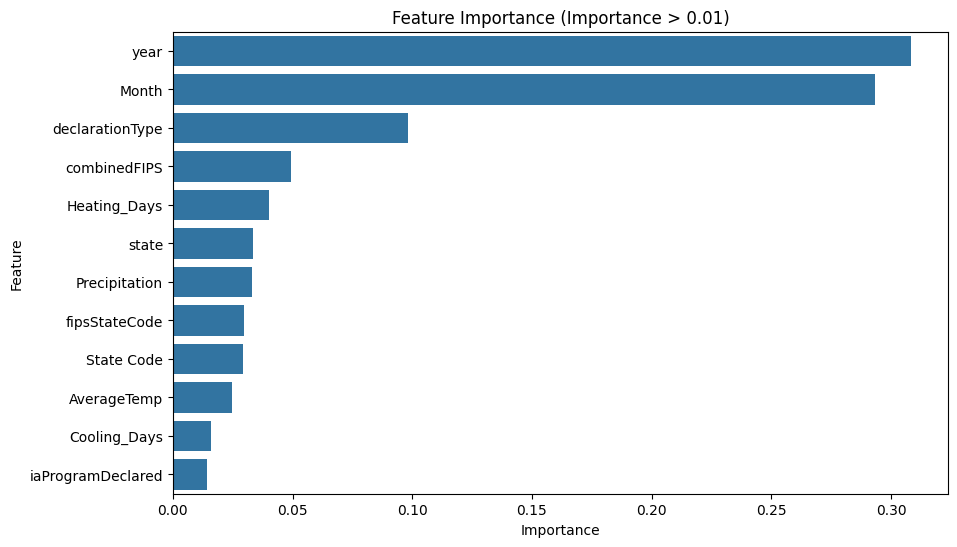

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assuming you have a dataset with features `X` and target variable `y`
# Instead of using .unique(), we should directly assign the 'incidentType' column to y
# This will ensure y has the same number of samples as X

# Applying the same categorical conversion to 'df' as done with 'data' previously
categorical_cols = ['state', 'declarationType', 'incidentType', 'designatedArea', 'State Code', 'Month']
for col in categorical_cols:
    df[col] = pd.Categorical(df[col]).codes

X = df.drop('incidentType', axis=1)  # Features
y = df['incidentType']  # Target variable # The change is on this line

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Train the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Step 2: Calculate Feature Importances
importances = dtree.feature_importances_

# Step 3: Create a DataFrame for Feature Importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Step 4: Set a threshold for feature importance
threshold = 0.01  # You can adjust this threshold as needed

# Step 5: Filter features with importance above the threshold
important_features_df = feature_importance_df[feature_importance_df['Importance'] > threshold].sort_values(by='Importance', ascending=False)

# Print the important features
print(f"Feature Importances (Importance > {threshold}):")
print(important_features_df)

# Step 6: Visualize the filtered feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=important_features_df, x='Importance', y='Feature')
plt.title(f'Feature Importance (Importance > {threshold})')
plt.show()

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# Assume your dataset is stored as a CSV file and has a target column named 'target'
# data = pd.read_csv("your_dataset.csv")


# Check class distribution
print("Original class distribution:", y.value_counts())

# Calculate value counts for each class in 'incidentType'
class_counts = df['incidentType'].value_counts()

# Filter out classes with counts <= 2
classes_to_keep = class_counts[class_counts > 2].index

# Filter the DataFrame to keep only the desired classes
df = df[df['incidentType'].isin(classes_to_keep)]


print("Original class distribution:", y.value_counts())

X = df.drop('incidentType', axis=1)  # Features
y = df['incidentType']  # Target variable # The change is on this line
print("Original class distribution:", y.value_counts())

categorical_cols = ['state', 'declarationType', 'designatedArea', 'State Code', 'Month']
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Apply SMOTE to the training data
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check class distribution after applying SMOTE
print("Resampled class distribution:", pd.Series(y_train_res).value_counts())

# # Train a classifier on the resampled data
# classifier = RandomForestClassifier(random_state=42)
# classifier.fit(X_train_res, y_train_res)

# # Evaluate the model on the original test set
# y_pred = classifier.predict(X_test)
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

Original class distribution: incidentType
14    9718
10    6366
7     5180
0     3915
15    1912
13    1655
5     1578
17     911
3      506
1      470
12     229
8      165
23      48
19      44
6       33
4       26
22      12
18       7
20       7
9        6
16       4
2        4
11       2
21       2
Name: count, dtype: int64
Original class distribution: incidentType
14    9718
10    6366
7     5180
0     3915
15    1912
13    1655
5     1578
17     911
3      506
1      470
12     229
8      165
23      48
19      44
6       33
4       26
22      12
18       7
20       7
9        6
16       4
2        4
11       2
21       2
Name: count, dtype: int64
Original class distribution: incidentType
14    9718
10    6366
7     5180
0     3915
15    1912
13    1655
5     1578
17     911
3      506
1      470
12     229
8      165
23      48
19      44
6       33
4       26
22      12
18       7
20       7
9        6
16       4
2        4
Name: count, dtype: int64
Resampled class distributi

In [ ]:
def add_laplace_noise(data, sensitivity, epsilon):
    scale = sensitivity / epsilon
    noise = np.random.laplace(0, scale, data.shape)
    noisy_data = data + noise
    return noisy_data

def evaluate_utility(noisy_X_train, noisy_X_test, y_train, y_test):
    clf = RandomForestClassifier(random_state=42)
    clf.fit(noisy_X_train, y_train)
    y_pred = clf.predict(noisy_X_test)
    return accuracy_score(y_test, y_pred)

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# X = df.drop('incidentType', axis=1)  # Features
# y = df['incidentType']  # Target variable # The change is on this line
# print("Original class distribution:", y.value_counts())

# categorical_cols = ['state', 'declarationType', 'designatedArea', 'State Code', 'Month']
# for col in categorical_cols:
#     le = LabelEncoder()
#     X[col] = le.fit_transform(X[col])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

sensitivity = 2
epsilon_values = np.linspace(0.1, 10, 30)
accuracies = []


for epsilon in epsilon_values:
    noisy_X_train = add_laplace_noise(X_train_res, sensitivity, epsilon)
    noisy_X_test = add_laplace_noise(X_test, sensitivity, epsilon)
    accuracy = evaluate_utility(noisy_X_train, noisy_X_test, y_train_res, y_test)
    accuracies.append(accuracy)


plt.figure(figsize=(10,6))
plt.plot(accuracies, epsilon_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Utility (Accuracy)')
plt.ylabel('epsilon')
plt.title('Epsilon-Utility Tradeoff Curve')
plt.grid(True)
plt.show()


optimal_index = np.argmax(accuracies)
optimal_epsilon = epsilon_values[optimal_index]

print(f"Optimal Epsilon: {optimal_epsilon}")

In [ ]:
from sklearn.preprocessing import StandardScaler
noisy_X_train = add_laplace_noise(X_train, sensitivity, optimal_epsilon)
noisy_X_test = add_laplace_noise(X_test, sensitivity, optimal_epsilon)
sc=StandardScaler()
X_train_scaled = sc.fit_transform(noisy_X_train)
X_test_scaled = sc.transform(noisy_X_test)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
accuracy = model.score(X_test_scaled, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

In [ ]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd  # Ensure pandas is imported

# # Load your data
# # Replace 'data' with the name of your DataFrame variable
# X = data.drop('incidentType', axis=1)  # Replace 'incidentType' with your actual target column
# y = data['incidentType']               # Replace 'incidentType' with your actual target column

# # Encode the target variable
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Convert categorical features to numerical using one-hot encoding
# categorical_cols = ['state', 'declarationType', 'designatedArea', 'State Code', 'Month']
# X = pd.get_dummies(X, columns=categorical_cols)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Fit the model to the training data
xgb_model.fit(X_train_scaled, y_train_res)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Decode predictions back to original labels for easier interpretation
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))


In [ ]:
!pip install lime

In [ ]:
from lime import lime_tabular

# Create a LIME explainer
explainer = lime_tabular.LimeTabularExplainer(X_train_scaled.values,
                                               feature_names=X_train_scaled.columns,
                                               class_names=y.unique(),
                                               mode='classification')

# Explain a prediction (for example, the first instance in the test set)
i = 0
exp = explainer.explain_instance(X_test_scaled.values[i], xgb_model.predict_proba)

# Visualize the explanation
exp.show_in_notebook(show_table=True)


In [ ]:
import shap
import lime
import lime.lime_tabular

explainer = shap.Explainer(model.predict_proba, X_train_scaled)
shap_values = explainer(X_test_scaled)

for class_label in range(3):
  print(f"\nSHAP Summary Plot for Class {class_label} ({Y[class_label]})")

  class_shap_values = shap_values.values[:, :, class_label]
  shap.summary_plot(class_shap_values, X_test_scaled,
                    feature_names=features, show=False)
  plt.title(f"SHAP Summary Plot for Class {class_label} ({Y[class_label]})")
  plt.show()